# Credit Card Fraud Detection Project

## Overview:
This Jupyter Notebook presents a machine learning project focused on detecting fraudulent credit card transactions. The dataset used in this project contains transactions made by European cardholders in September 2013.

## Dataset Characteristics:
- **Source:** [Credit Card Fraud Detection Dataset on Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
- **Size:** 284,807 transactions over two days
- **Imbalance:** 492 frauds (0.172% of transactions)
- **Features:** Principal components obtained through PCA, 'Time,' and 'Amount'

## Modeling Approach:
- **Algorithm:** Random Forest Classifier
- **Hyperparameter Tuning:** Performed using GridSearchCV
- **Evaluation Metrics:** Accuracy, Precision, Recall, F1-score, and Confusion Matrix (with a focus on AUPRC due to class imbalance)

## Acknowledgments:
- The dataset is a result of a collaboration between Worldline and the Machine Learning Group (MLG) of ULB.

## Project Workflow:
1. Data Exploration and Preprocessing
2. Model Selection and Hyperparameter Tuning
3. Model Evaluation on Test Data
4. Training Final Model on Full Data
5. Evaluation of Final Model on Full Test Data
6. Saving and Loading the Final Model

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [2]:
data_path = "/kaggle/input/creditcardfraud/creditcard.csv"
data = pd.read_csv(data_path)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

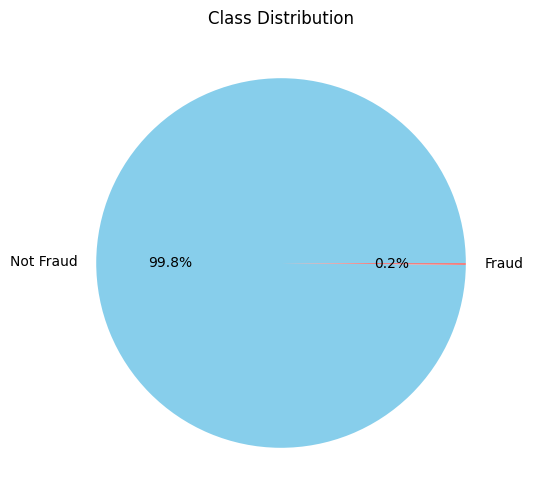

In [7]:
class_counts = data["Class"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(class_counts, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], labels=['Not Fraud', 'Fraud'])
plt.title('Class Distribution')
plt.show()

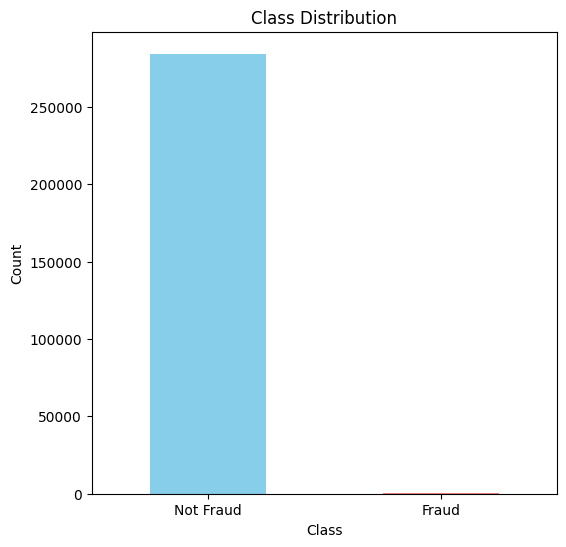

In [8]:
class_counts = data["Class"].value_counts()

plt.figure(figsize=(6, 6))
class_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'], rotation=0)
plt.show()

# Data Preprocessing

In [9]:
data.drop(columns=['Time'], inplace=True)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X = data.drop('Class', axis=1)
y = data['Class']

numerical_columns = X.columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Hyperparameter Tuning

In [11]:
X_train_subset, X_temp, y_train_subset, y_temp = train_test_split(X_train_transformed, y_train, test_size=0.8, random_state=42, stratify=y_train)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
param_grid = {
    'n_estimators': [40, 60, 100],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=2)

grid_search.fit(X_train_subset, y_train_subset)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   6.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   5.4s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   9.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   5.9s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   6.3s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   9.1s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  16.4s
[CV

In [13]:
print("Best Parameters:", best_params)
print("Best Random Forest Classifier Model:", best_rf_model)

Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 60}
Best Random Forest Classifier Model: RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=60)


In [14]:
X_test_subset, X_temp, y_test_subset, y_temp = train_test_split(X_test_transformed, y_test, test_size=0.5, random_state=42, stratify=y_test)

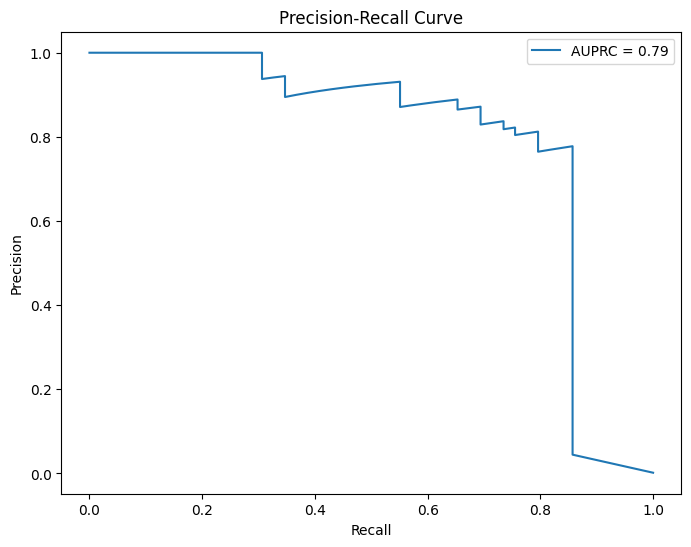

Classification Metrics:
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.81      0.78      0.79        49

    accuracy                           1.00     28481
   macro avg       0.90      0.89      0.90     28481
weighted avg       1.00      1.00      1.00     28481

Confusion Matrix:
 [[28423     9]
 [   11    38]]
The parameters of the best model:
{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 60}


In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, auc

y_pred_best = best_rf_model.predict(X_test_subset)
y_scores_best = best_rf_model.predict_proba(X_test_subset)[:, 1]  # Probability estimates for positive class

precision, recall, _ = precision_recall_curve(y_test_subset, y_scores_best)
auprc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

accuracy = accuracy_score(y_test_subset, y_pred_best)
classification_rep = classification_report(y_test_subset, y_pred_best)
conf_matrix = confusion_matrix(y_test_subset, y_pred_best)

print("Classification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)
print(f"The parameters of the best model:\n{best_params}")

# Train The Final Model - Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

final_model = RandomForestClassifier(**best_params)
final_model.fit(X_train_transformed, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=60)

# Evaluating The Final Model

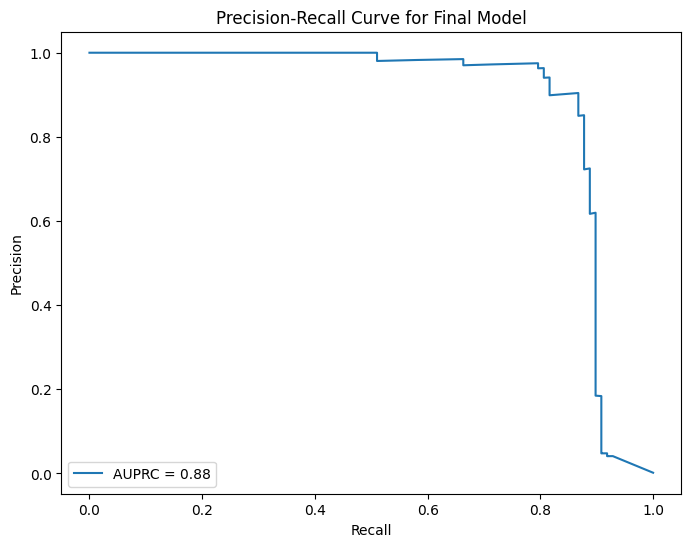

Classification Metrics for Final Model:
Accuracy: 1.00
Precision: 0.93
Recall: 0.82
F1 Score: 0.87
Confusion Matrix for Final Model:
 [[56858     6]
 [   18    80]]


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc

y_pred_final = final_model.predict(X_test_transformed)
y_scores_final = final_model.predict_proba(X_test_transformed)[:, 1]  # Probability estimates for positive class

precision_final, recall_final, _ = precision_recall_curve(y_test, y_scores_final)
auprc_final = auc(recall_final, precision_final)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_final, precision_final, label=f'AUPRC = {auprc_final:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Final Model')
plt.legend(loc='best')
plt.show()

accuracy_final = accuracy_score(y_test, y_pred_final)
precision_final = precision_score(y_test, y_pred_final)
recall_final = recall_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final)
conf_matrix_final = confusion_matrix(y_test, y_pred_final)

print("Classification Metrics for Final Model:")
print(f"Accuracy: {accuracy_final:.2f}")
print(f"Precision: {precision_final:.2f}")
print(f"Recall: {recall_final:.2f}")
print(f"F1 Score: {f1_final:.2f}")
print("Confusion Matrix for Final Model:\n", conf_matrix_final)

# Save The Final Model

In [18]:
import joblib

joblib.dump(final_model, "final_credit_card_fraud_detection_model.joblib")
print("Final model saved as 'final_credit_card_fraud_detection_model.joblib'")

# loaded_model = joblib.load("final_credit_card_fraud_detection_model.joblib")

Final model saved as 'final_credit_card_fraud_detection_model.joblib'
